## Reading the data:
    For reading the data, we are using pandas, it will read the data from the preprocessed data directory and load it into a dataframe.

In [38]:
import pandas as pd

import warnings ## To ignore the warnings
warnings.filterwarnings('ignore')

traindf = pd.read_csv("Trainingdata.csv")
#testdf = pd.read_csv("Testdata.csv")


In [32]:
traindf.columns

Index(['0', '0.1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

## Seperating the independent and dependent variables

In [33]:

X_train=traindf.loc[:, traindf.columns != '0'] # It will contains all columns except our target column
y_train=traindf.loc[:, traindf.columns == '0'] #It will contain target column

In [5]:

X_test=traindf.loc[:, traindf.columns != '10'] # It will contains all columns except our target column
y_test=traindf.loc[:, traindf.columns == '10'] #It will contain target column

## K Fold cross validation:

In [64]:
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


def k_fold_cross_validation(training_columns, labels, Classifier, name_of_model): 
 

    kf = KFold( shuffle=True,n_splits=10)# Initializing KFold object with 10 as k-value
    accs=[]
    training_columns_train_array = []
    labels_train_array = []
    training_columns_test_array = []
    labels_test_array = []
    iter = 0
    print("Applying K fold cv algorithm for :", (name_of_model))
    for training_indices, test_indices in kf.split(training_columns):
        iter += 1
        print("iter ", iter)
        training_columns_train_cv, labels_train_cv = training_columns.iloc[training_indices], labels.iloc[training_indices]
        training_columns_test_cv, labels_test_cv = training_columns.iloc[test_indices], labels.iloc[test_indices]
        training_columns_train_array.append(training_columns_train_cv) # adding training score for  the given iteration
        training_columns_test_array.append(training_columns_test_cv) # adding test score for iteration
        labels_train_array.append(labels_train_cv)  # adding training labels for  the given iteration
        labels_test_array.append(labels_test_cv)  # adding test labels for  the given iteration
        print("Shape of training training_columns: ", training_columns_train_cv.shape)
        print("Shape of test training_columns: ", training_columns_test_cv.shape)
        Classifier.fit(training_columns_train_cv, labels_train_cv) 
        preds = Classifier.predict(training_columns_test_cv)
        score = accuracy_score(preds, labels_test_cv) # Calculating acc
        accs.append(score) # adding k-fold  acc for each iter
    print("List of k-fold  accs for {}: ".format(name_of_model), accs)
    average_acc = np.mean(accs)
    print("\nAverage k-fold  acc for {}: ".format(name_of_model), average_acc)
    print("\nBest k-fold  acc for {}: ".format(name_of_model), max(accs))
    maximum_acc_index = accs.index(max(accs)) # best k-fold  acc
    maximum_acc_training_columns_train = training_columns_train_array[maximum_acc_index] # training training_columns corresponding to best k-fold  acc
    maximum_acc_training_columns_test = training_columns_test_array[maximum_acc_index] # test training_columns corresponding to best k-fold  acc
    maximum_acc_labels_train = labels_train_array[maximum_acc_index] # training labels corresponding to best k-fold  acc
    maximum_acc_labels_test = labels_test_array[maximum_acc_index] # test labels corresponding to best k-fold  acc

 

    return average_acc, maximum_acc_training_columns_train, maximum_acc_training_columns_test, maximum_acc_labels_train, maximum_acc_labels_test,accs



## To visualize the performance of each Classifier, we will be noting its  accuracy
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
def evaluate(max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test, targets, regr): 
    regr.fit(max_acc_data_train, max_acc_targets_train) #
    targets_pred = regr.predict(max_acc_data_test) # Prediction on test data
    
    print("roc_auc_score")
    rep = roc_auc_score(max_acc_targets_test, targets_pred)
    print(rep)
    
    
    

## Simple Classification models with default parameters:

Applying K fold cv algorithm for : DT
iter  1
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  2
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  3
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  4
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  5
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  6
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  7
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  8
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  9
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  10
Shape of training training_columns:  (80674,

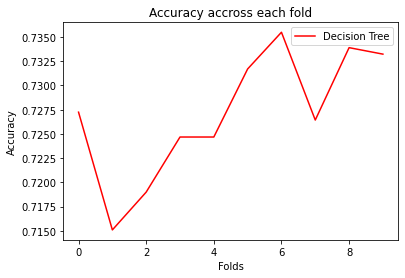

In [65]:
from sklearn.tree import DecisionTreeClassifier


DT_clf = DecisionTreeClassifier() # DT Model
DT_mean_accuracy, max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test,dt_scores = k_fold_cross_validation(X_train, y_train, DT_clf, "DT") # cross-validation
evaluate(max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test, y_train, DT_clf) #  confusion matrix

## Comparision through graphs


## argument has accuracy values
plt.plot(dt_scores,color='r',label="Decision Tree")
plt.legend(loc="best")

plt.title("Accuracy accross each fold") ## Setting subtitle of fig 1
plt.xlabel("Folds") ## Setting x-label of fig 1
plt.ylabel("Accuracy"); ## Setting y-label of fig 1

Applying K fold cv algorithm for : RF
iter  1
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  2
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  3
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  4
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  5
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  6
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  7
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  8
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  9
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  10
Shape of training training_columns:  (80674,

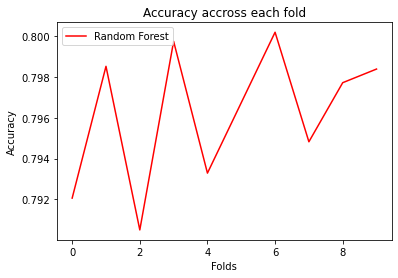

In [66]:
from sklearn.ensemble import RandomForestClassifier

DT_clf = RandomForestClassifier() # DT Model
DT_mean_accuracy, max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test,dt_scores = k_fold_cross_validation(X_train, y_train, DT_clf, "RF") # cross-validation
evaluate(max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test, y_train, DT_clf) #  confusion matrix

## Comparision through graphs


## argument has accuracy values
plt.plot(dt_scores,color='r',label="Random Forest")
plt.legend(loc="best")

plt.title("Accuracy accross each fold") ## Setting subtitle of fig 1
plt.xlabel("Folds") ## Setting x-label of fig 1
plt.ylabel("Accuracy"); ## Setting y-label of fig 1

Applying K fold cv algorithm for : LinearSVC
iter  1
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  2
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  3
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  4
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  5
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  6
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  7
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  8
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  9
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  10
Shape of training training_columns:  

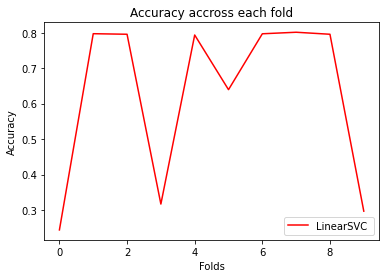

In [67]:
from sklearn.svm import LinearSVC


DT_clf = LinearSVC() #  Model
DT_mean_accuracy, max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test,dt_scores = k_fold_cross_validation(X_train, y_train, DT_clf, "LinearSVC") # cross-validation
evaluate(max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test, y_train, DT_clf) #  confusion matrix

## Comparision through graphs


## argument has accuracy values
plt.plot(dt_scores,color='r',label="LinearSVC ")
plt.legend(loc="best")

plt.title("Accuracy accross each fold") ## Setting subtitle of fig 1
plt.xlabel("Folds") ## Setting x-label of fig 1
plt.ylabel("Accuracy"); ## Setting y-label of fig 1

Applying K fold cv algorithm for : SVC
iter  1
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  2
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  3
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  4
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  5
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  6
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  7
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  8
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  9
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  10
Shape of training training_columns:  (80674

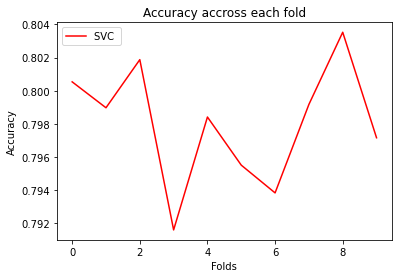

In [76]:
from sklearn.svm import SVC


DT_clf = SVC(kernel='rbf') #  Model
DT_mean_accuracy, max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test,dt_scores = k_fold_cross_validation(X_train[:100000], y_train[:100000], DT_clf, "SVC") # cross-validation
evaluate(max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test, y_train, DT_clf) #  confusion matrix

## Comparision through graphs


## argument has accuracy values
plt.plot(dt_scores,color='r',label="SVC ")
plt.legend(loc="best")

plt.title("Accuracy accross each fold") ## Setting subtitle of fig 1
plt.xlabel("Folds") ## Setting x-label of fig 1
plt.ylabel("Accuracy"); ## Setting y-label of fig 1

### Reporting estimated performances. 

| Classifier | AUC score | Accuracy |
| --- | --- | --- |
| RF | .56 | .79 |
| DT | .60 | .73 |
| Linear SVC | .5 | .80 |
| Rbf SVC | .5 | .80 |


### Should you use accuracy or AUC as a metric for this task?

    AUC is in fact often preferred over accuracy for binary classification. Although both metrics have intuitive interpretations. For this task AUC is prefered. The reason for this is that computing the AUC is equivalent to defining a misclassification loss function (which reflects the relative gravity of misclassifying one class over the other), and averaging it over the distribution of the scores of the points in your dataset. The problem here is that those scores are produced by the fitted model, and as such they change whenever we change the model itself, be it the type of algorithm or just the parameters/hyperparameters.

## Hyper parameter tuning:

In [45]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
model = DecisionTreeClassifier()

min_impurity_decreases = [0.1,0.5,0.8]
max_depths = [None, 5, 10, 15]
max_leaf_Nodes = [None, 10,100]
# define grid search
from sklearn.model_selection import GridSearchCV
grid = dict(min_impurity_decrease=min_impurity_decreases,max_depth=max_depths,max_leaf_nodes=max_leaf_Nodes)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv)
grid_result = grid_search.fit(X_train[:1000], y_train[:1000])
# summarize results

print("Best: parameters %s" % ( grid_result.best_params_))

Best: parameters {'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1}


In [46]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 3)


# Fit the grid search to the data
grid_search.fit(X_train[:1000], y_train[:1000])
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

Applying K fold cv algorithm for : DT
iter  1
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  2
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  3
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  4
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  5
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  6
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  7
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  8
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  9
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  10
Shape of training training_columns:  (80674,

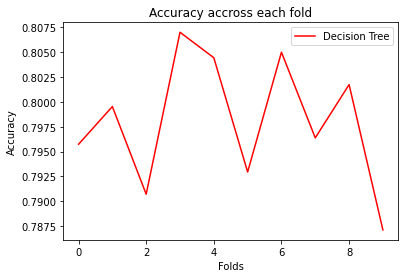

In [74]:
from sklearn.tree import DecisionTreeClassifier


DT_clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.1) # DT Model
DT_mean_accuracy, max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test,dt_scores = k_fold_cross_validation(X_train, y_train, DT_clf, "DT") # cross-validation
evaluate(max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test, y_train, DT_clf) #  confusion matrix

## Comparision through graphs


## argument has accuracy values
plt.plot(dt_scores,color='r',label="Decision Tree")
plt.legend(loc="best")

plt.title("Accuracy accross each fold") ## Setting subtitle of fig 1
plt.xlabel("Folds") ## Setting x-label of fig 1
plt.ylabel("Accuracy"); ## Setting y-label of fig 1

Applying K fold cv algorithm for : RF
iter  1
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  2
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  3
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  4
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  5
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  6
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  7
Shape of training training_columns:  (80673, 11)
Shape of test training_columns:  (8964, 11)
iter  8
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  9
Shape of training training_columns:  (80674, 11)
Shape of test training_columns:  (8963, 11)
iter  10
Shape of training training_columns:  (80674,

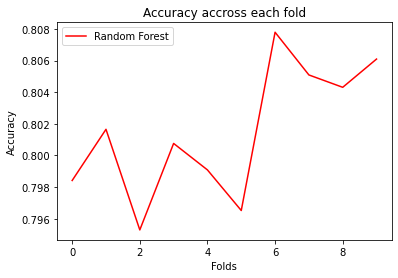

In [75]:
from sklearn.ensemble import RandomForestClassifier

DT_clf = RandomForestClassifier(max_depth=80,
 max_features=3,
 min_samples_leaf=3,
 min_samples_split=10,
 n_estimators=100) # DT Model
DT_mean_accuracy, max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test,dt_scores = k_fold_cross_validation(X_train, y_train, DT_clf, "RF") # cross-validation
evaluate(max_acc_data_train, max_acc_data_test, max_acc_targets_train, max_acc_targets_test, y_train, DT_clf) #  confusion matrix

## Comparision through graphs


## argument has accuracy values
plt.plot(dt_scores,color='r',label="Random Forest")
plt.legend(loc="best")

plt.title("Accuracy accross each fold") ## Setting subtitle of fig 1
plt.xlabel("Folds") ## Setting x-label of fig 1
plt.ylabel("Accuracy"); ## Setting y-label of fig 1

###  Estimated performance for the tuned classifiers.

| Classifier | AUC score | Accuracy |
| --- | --- | --- |
| RF | .52 | .80 |
| DT | .5 | .80 |

## SVM:

In [49]:
class svc:
    def __init__(self , C = 0.01 , number_of_iterations = 100 , learning_rate = 0.1):
 
        self.c = C
        self.iteration = number_of_iterations
        self.lr = learning_rate
            
    def fit(self , x , y):
        self.x = x
        self.y = y
        
        w = np.zeros([1 , x.shape[1]])
        b = 0
        
        costs = np.zeros(self.iteration)
        for i in range(self.iteration):
            cost = x @ w.T + b
            b = b - self.lr * self.c * sum(cost - y) 
            w = w - self.lr * self.c * sum((cost - y)*x) 
            costs[i] = self.c * sum( (y * cost)  + (1 - y)*cost ) + (1/2)* sum(w.T**2)
        
        self.w = w
        self.b = b 
        self.costs = costs
        
    
    def predict(self , x_test):
        pred_y =  []
        svc = x_test @ self.w.T + self.b
        for i in svc:
            if i >= 0:
                pred_y.append(1)
            else:
                pred_y.append(0)
        
        return pred_y

In [55]:
clf = svc()

clf.fit(X_train.values, y_train.values.reshape([len(y_train) , 1]))

In [61]:
preds = clf.predict(X_train.values)
print("Accuracy for our custom SVM is",accuracy_score(preds,y_train))

Accuracy for our custom SVM is 0.79806329975345


### Performance comparison

    We have very similar results for SVM implemented in sklearn and our own custome implementation.  In the case of the simple SVM we used "linear" kernel. However, the performance of sklearn provides rbf kernel too, which has better performance than simple linear classsifier.

## Key Findings:
    
    * According to the model's predictions, most of the patients show up on the appointment date.
    * Person with some disbailities miss some of the appointments.
    * The data set is linearly seperable, which means a linear clsssifer can easily predict the boundaries of both classes.
    * Random Forest outperforms other algorithm in most of the cases.
    * The data set is imabalanced, so a metric like AUC is more interpretable in this case.
    * Maximum accuracy achieved by our models is 80% on the test data set.